In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import sys
import os

if "srdjan" in os.getcwd():
    %load_ext autoreload
    %autoreload 2
else:
    sys.path.insert(0, '/data/useful/scripts')

import pandas as pd
from IPython.display import display, HTML
%config InlineBackend.figure_format='retina'
from data_fit import Fit

#### importing data for the standard curve

`make sure the separator is a comma "," and not a semicolon ";"`

In [5]:
###### this is where you put the full path to data ########
path_std = "/data/Anita/insulin_std_curve.csv"
###########################################################
std_data = pd.read_csv(path_std)
display(HTML("This is data for the standard curve:"))
display(std_data)

if "concentration" != std_data.columns[0]:
    raise ValueError("The file needs to have the first column named 'concentration'")
    
other_cols = std_data.columns[1:]
for i,col in enumerate(other_cols):
    if col != f"measurement_{i+1}":
        raise ValueError("Columns after 'concentration' need to be 'measurement_1', 'measurement_2', etc. This does not seem to be the case here.")

,concentration,measurement_1,measurement_2,measurement_3
0,8.000,9568.663286,10237.112600,9742.764719
1,3.200,5884.202795,5376.647247,5211.999080
2,1.280,2848.607912,3103.859475,2981.032699
3,0.512,2032.260668,1501.050107,1649.896685
4,0.205,1422.564071,1451.817180,1144.787606
5,0.082,884.739977,1069.191470,1154.083789
6,0.033,1033.090240,844.169203,836.418255
7,0.000,933.480664,971.778190,784.971661


#### Tidy

In [6]:
std_tidy = []
for i, col in enumerate(other_cols):
    df = std_data[['concentration',col]].copy()

    df = df.rename(columns={col:"measurement"})
    df['replicate'] = i+1
    std_tidy += [df]
std_tidy = pd.concat(std_tidy, ignore_index=True)

#### Fit

In [7]:
fit = Fit(std_tidy)

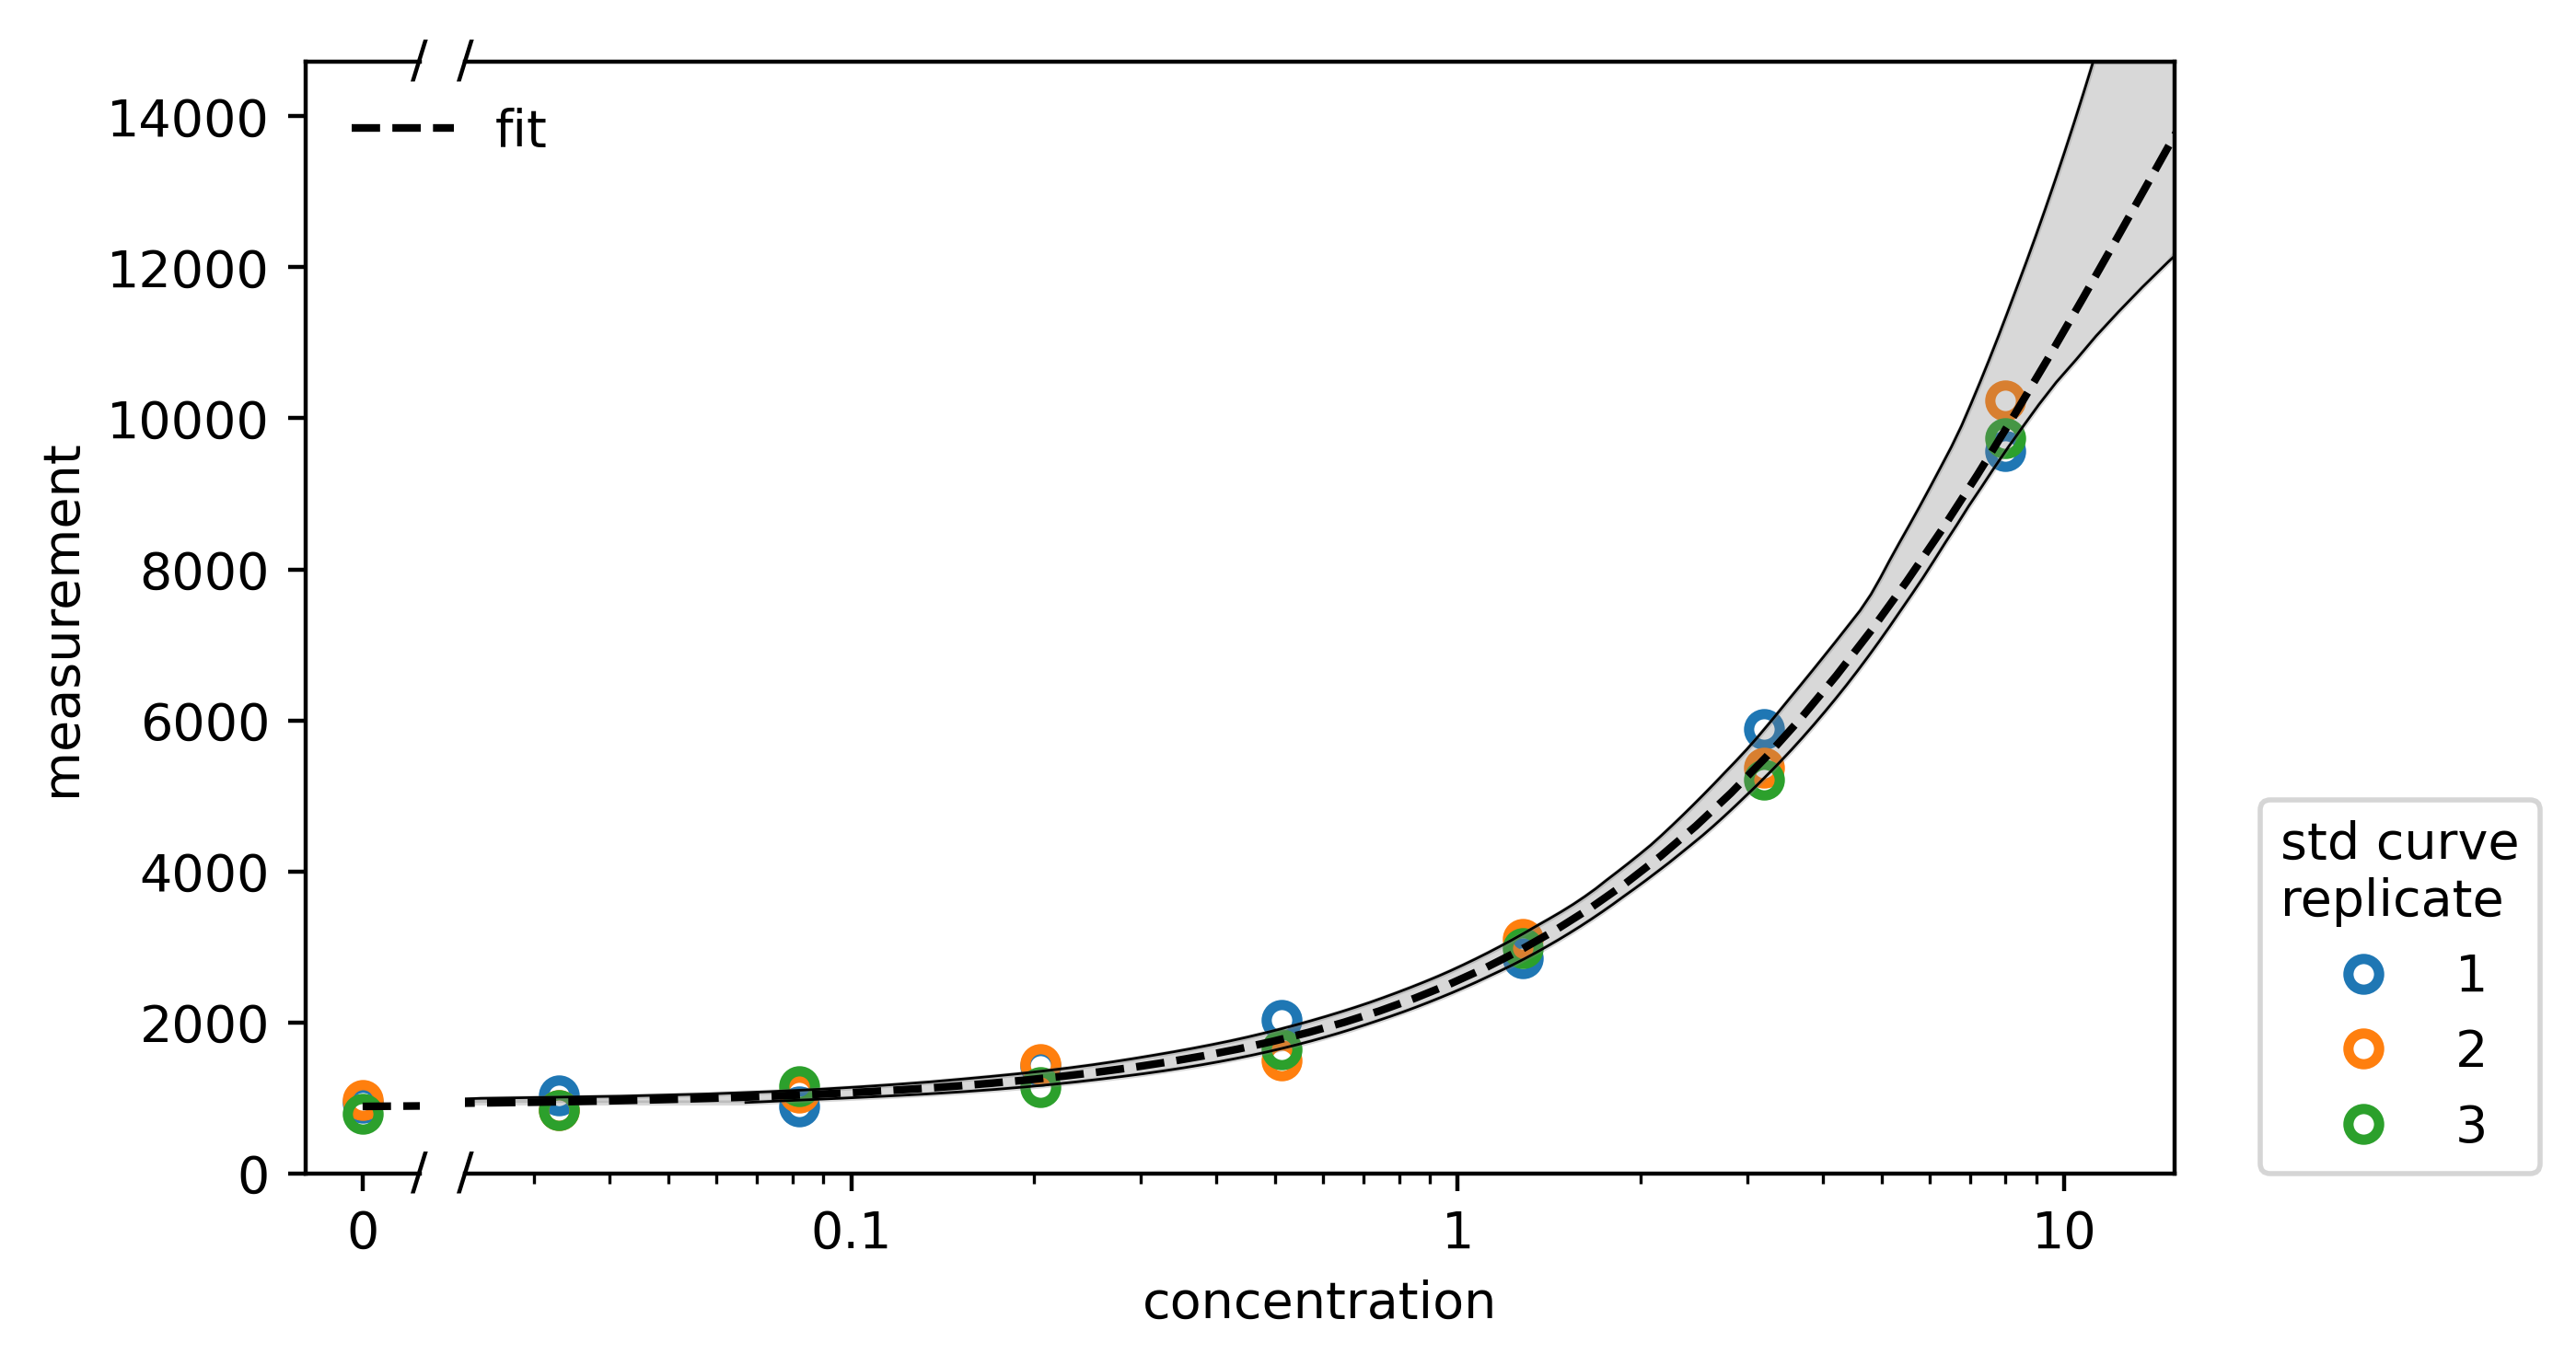

In [8]:
fig = fit.plot()

You may wish to see how the relative error of inferred values varies over the concentration range. This will tell you in which concentration region is your assat most reliable. For example, you may wish to discard all inferences where the relative error is larger than, say, 50%. This typically corresponds to some central range of measurements. For both too low and too high meassurements, you will get large relative errors.

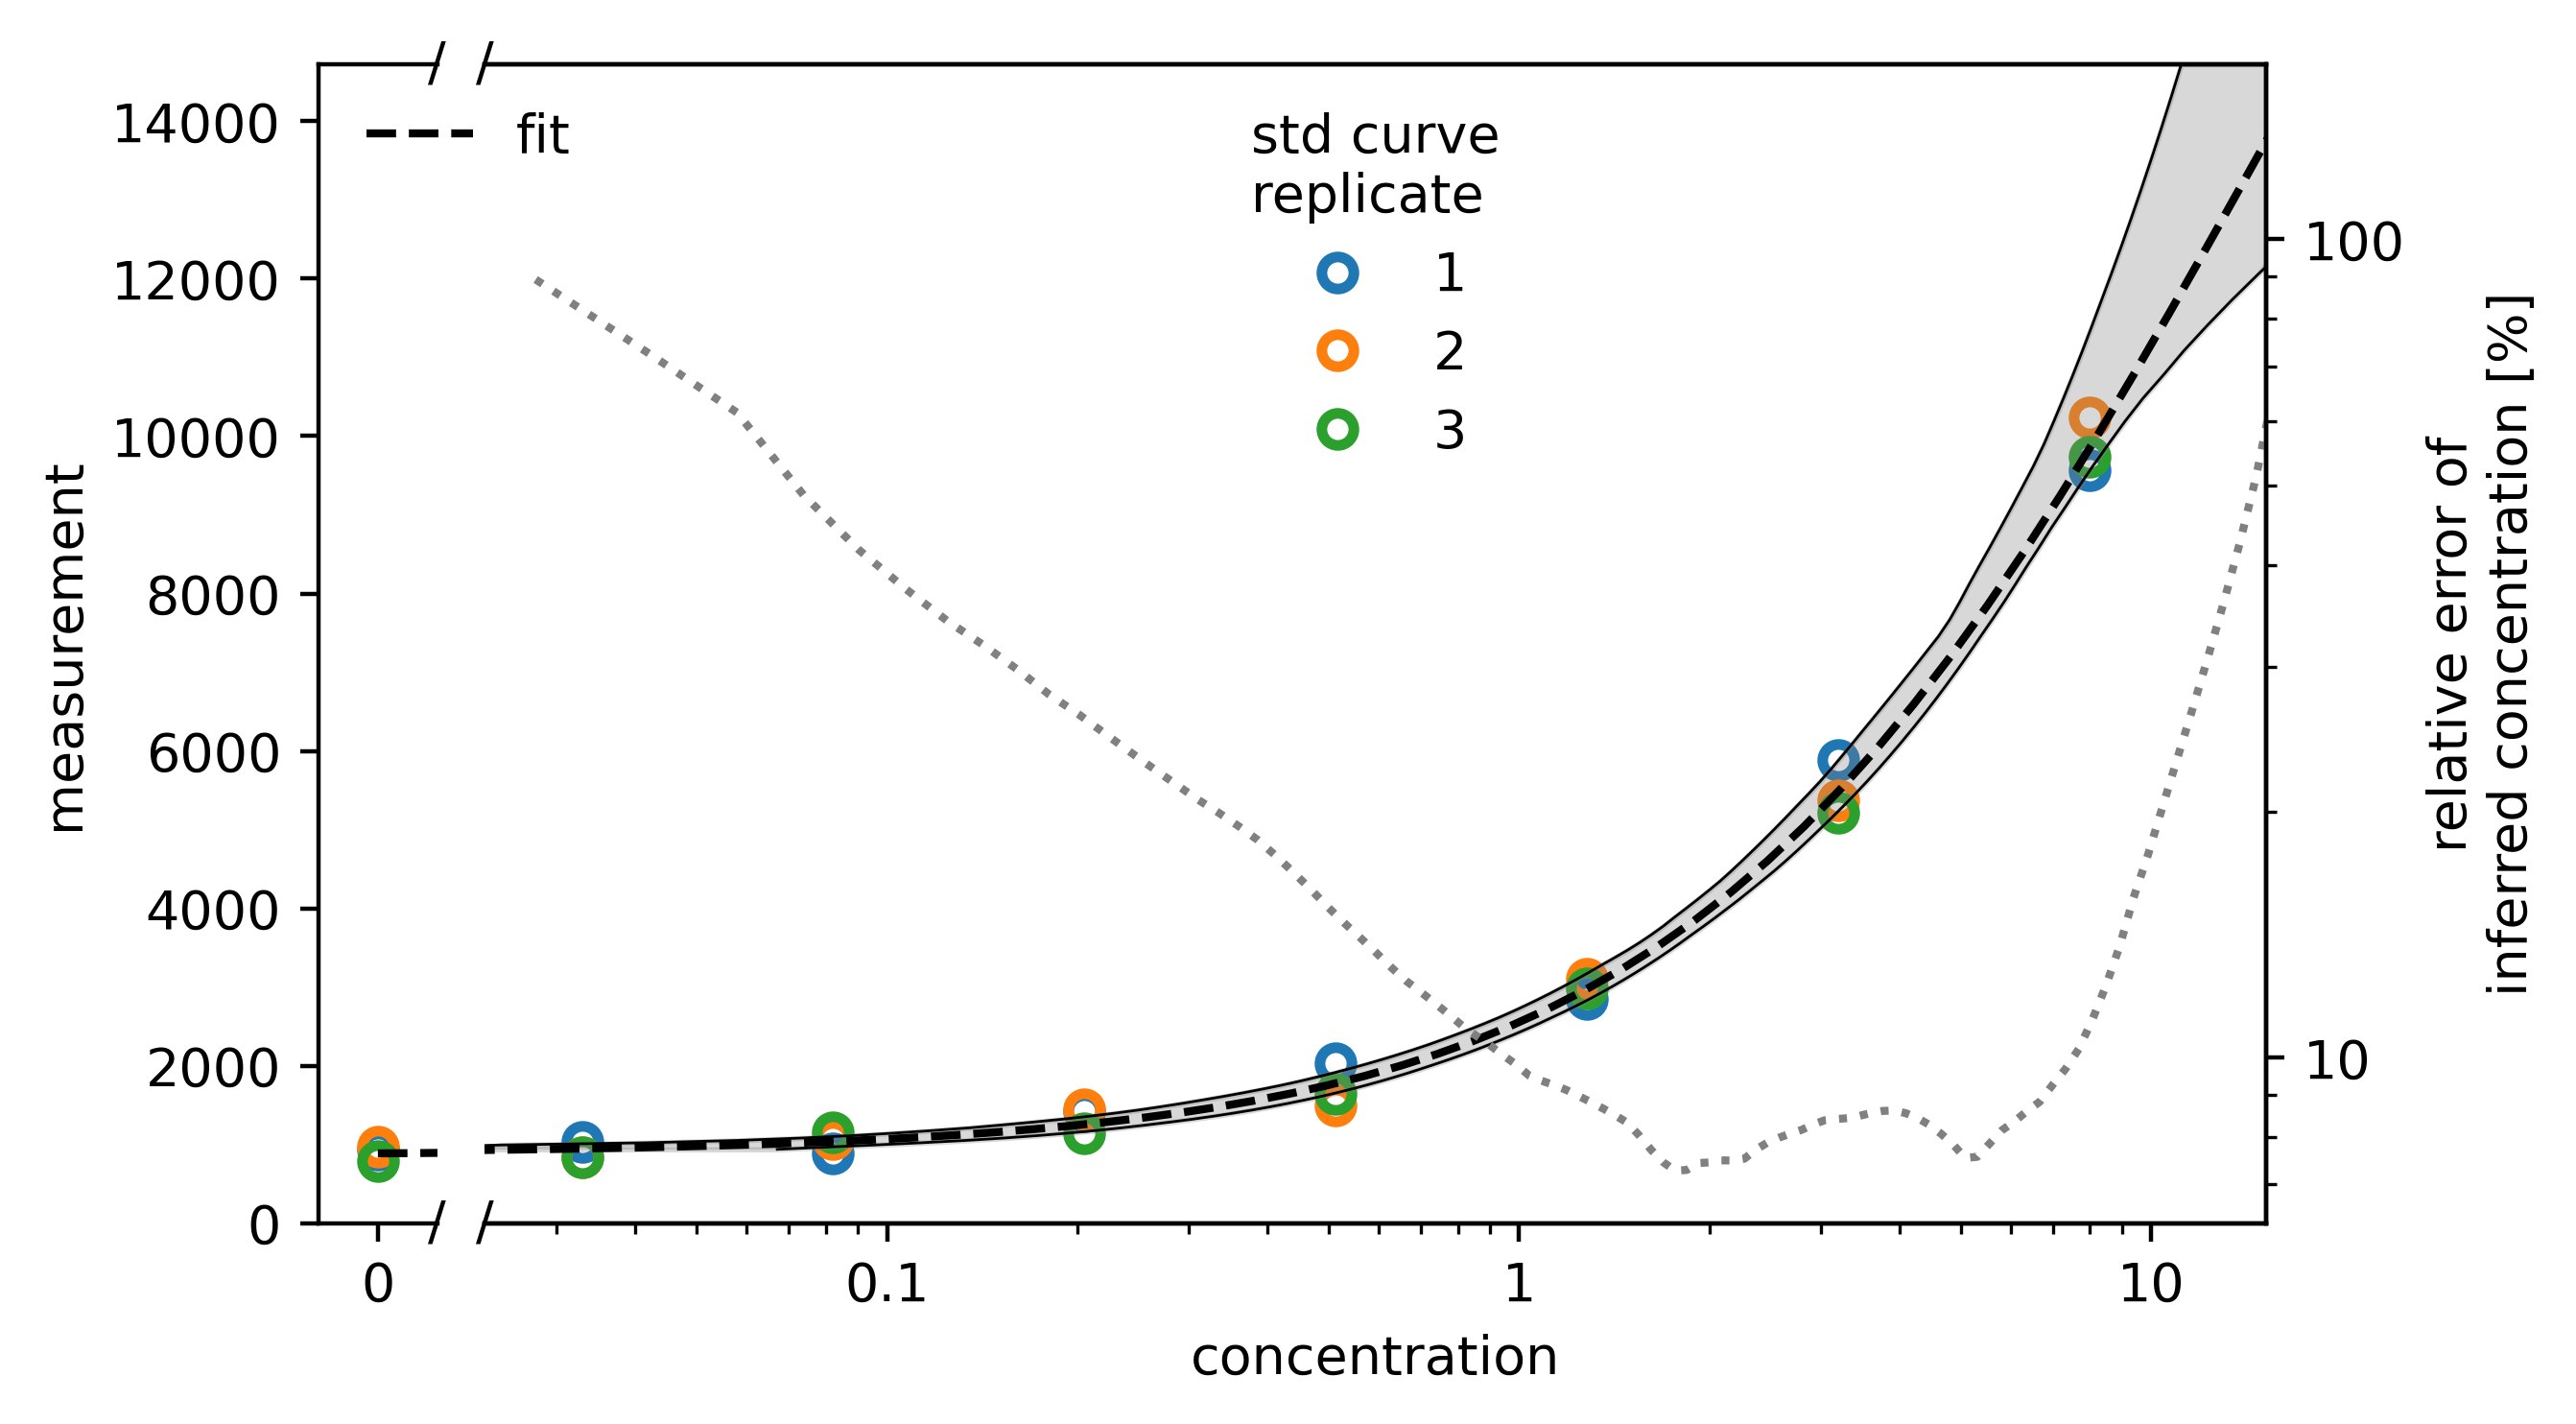

In [9]:
fig = fit.plot(show_relative_error=True)

#### importing the measurements for which you need to infer the concentration

In [10]:
path_infer = "/data/Anita/measurement.csv"
infer_data = pd.read_csv(path_infer)
display(HTML("These are the measurements you wish to infer"))
display(infer_data)

if "measurement" != infer_data.columns[0]:
    raise ValueError("The file needs to have the first column named 'measurement'. The other columns are irrelevant")

infer_data["measurement"] = infer_data["measurement"].astype("float")

for col in infer_data.columns[1:]:
    infer_data[col] = infer_data[col].astype(str)

,measurement,sample_ID
0,871.384693,tg 16.2.
1,854.447354,tg 14.2.
2,876.482259,tg 17.1.
3,1209.416555,wt 12.1.
4,910.771488,wt 8.2.
5,15625.364600,human 16mM 1:10
6,16665.549810,human 16mM 1:10
7,16659.454590,human 16mM 1:10
8,15175.293240,human 16mM 1:10


#### Results results

In [11]:
infer_data["inferred_concentration"] = fit.infer_values(infer_data['measurement'])

In [12]:
infer_data["inferred_lowerCI"], infer_data["inferred_upperCI"] = fit.infer_confidence_intervals(infer_data['measurement'])

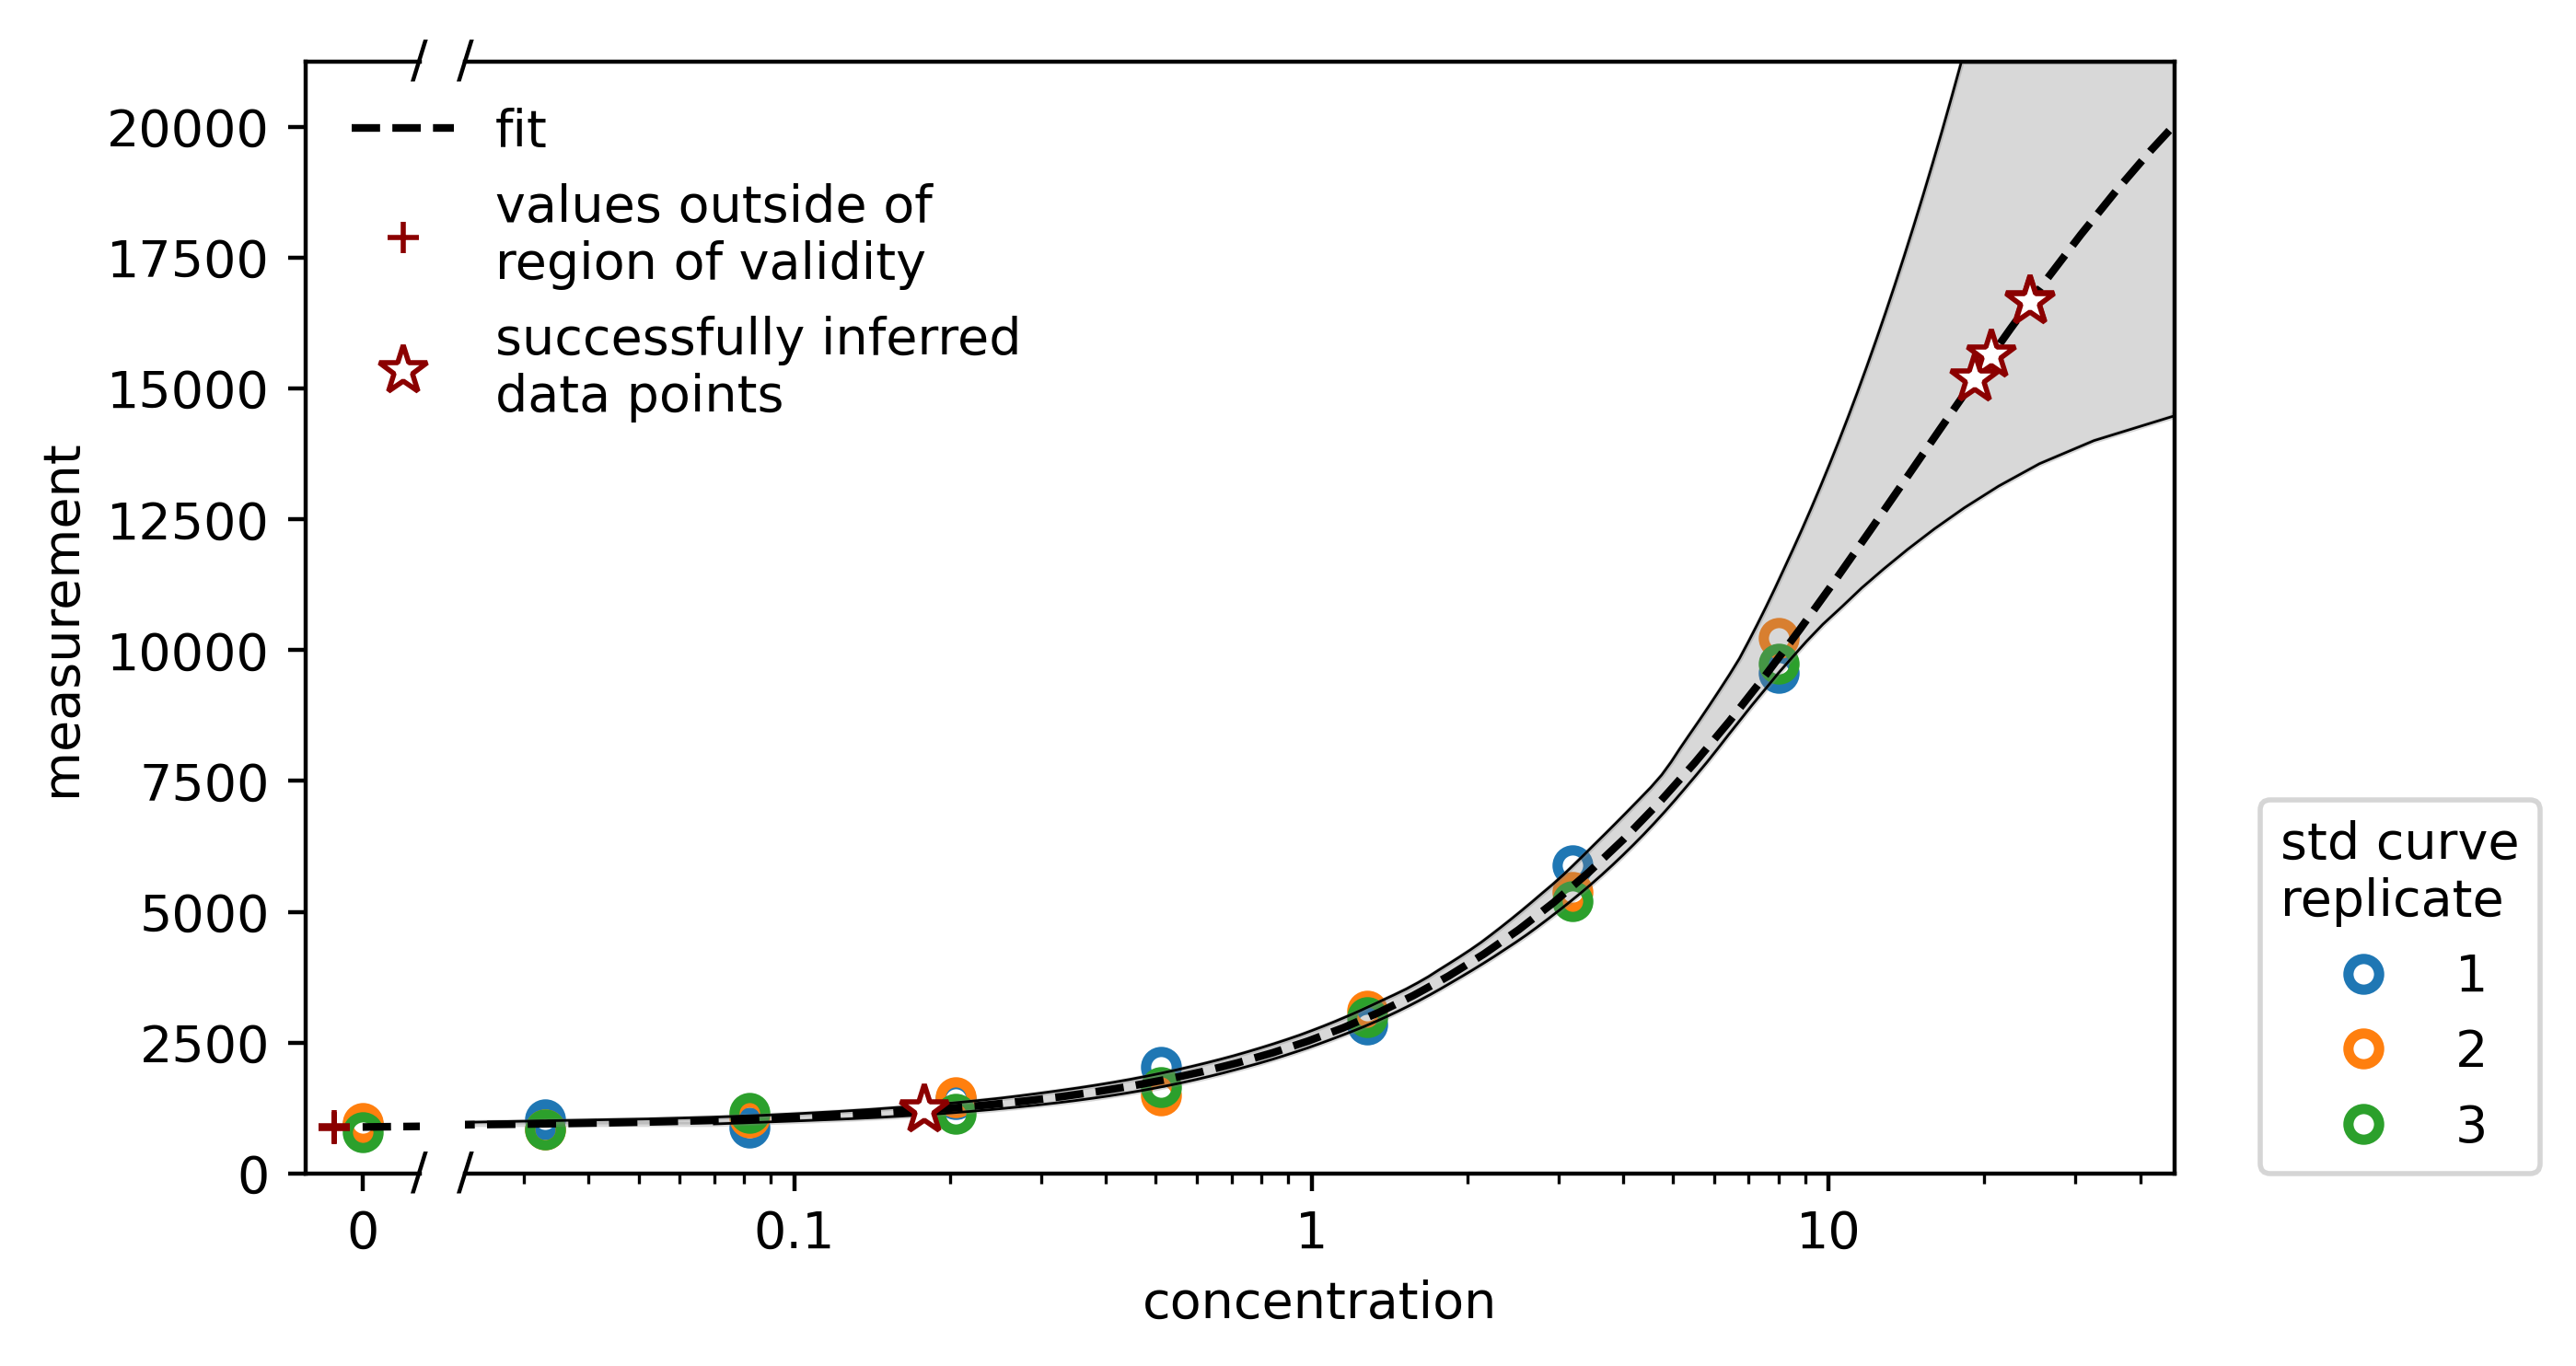

In [13]:
fig = fit.plot(
    infer_data=infer_data,
    show_relative_error=False, # or you can put it to True if you wish to see it
    show_confidence_intervals=False, # or you can put it to True if you wish to see them
)

##### if you wish to save the figure

`note that you need full path to figure file(s)!`

In [14]:
# as a png
fig.savefig("/data/Anita/inference.png")

In [15]:
# or pdf:
# fig.savefig("/data/Anita/inference.pdf")

In [16]:
# or svg:
# fig.savefig("/data/Anita/inference.svg")

SVG is good if you plan to edit the figure further with e.g. [InkScape](https://inkscape.org/)

##### if you wish to save the inferred values into a different csv

In [17]:
output = path_infer.replace(".csv", "_inferred.csv")
infer_data.to_csv(output)
print ("Saved under", output)

Saved under /data/Anita/measurement_inferred.csv
